In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
from statsmodels.stats.proportion import proportion_confint
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
from statsmodels.stats.proportion import proportion_confint
from pymer4.models import Lmer
from scipy.stats import binomtest

from helpers import array_stats
import glob

# Read in data

In [ ]:
import pandas as pd

In [5]:
files = "data/results/paper/dvb_results_*.csv"


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

def smart_rounder(x, precision=2, sci_threshold=1e-3):
    """
    Rounds a number using scientific notation or normal rounding based on its magnitude.

    Parameters:
    - x: The number to round.
    - precision: Number of decimal places for normal rounding (default: 2).
    - sci_threshold: Threshold below which scientific notation is used (default: 1e-3).

    Returns:
    - A string representing the rounded number.
    """
    if abs(x) < sci_threshold or abs(x) >= 1e6:
        return f"{x:.{precision}e}"
    else:
        return f"{round(x, precision)}"

def make_aesthetic(hex_color_list=None, 
	with_gridlines=False, 
	bold_title=False, 
	save_transparent=False, 
	font_scale=2, 
	latex2arial = True
	):
    """Make Seaborn look clean and add space between title and plot"""
    
    # Note: To make some parts of title bold and others not bold, we have to use
    # latex rendering. This should work: 
    # plt.title(r'$\mathbf{bolded\ title}$' + '\n' + 'And a non-bold subtitle')

    
    sns.set(style='white', context='paper', font_scale=font_scale)
    if not hex_color_list:
		    # 2024-11-28: Reordered color list
        hex_color_list = [
            "#2C3531",  # Dark charcoal gray with green undertone
            "#D41876",  # Telemagenta
            "#00A896",  # Persian green
            "#826AED",  # Medium slate blue
            "#F45B69",  # Vibrant pinkish-red
            "#E3B505",  # Saffron
            "#89DAFF",  # Pale azure
            "#342E37",  # Dark grayish-purple
            "#7DCD85",  # Emerald
            "#F7B2AD",  # Melon
            "#D4B2D8",  # Pink lavender
            "#020887",  # Phthalo blue
            "#E87461",  # Medium-bright orange
            "#7E6551",  # Coyote
            "#F18805"   # Tangerine
        ]
    
    sns.set_palette(sns.color_palette(hex_color_list))

    # Update on 
    # 2024-11-29: I realized I can automatically 
    # clean variable names so i dont have to manually replace underscore
    
    # Enhanced typography settings
    plt.rcParams.update({
        # font settings
        'font.family': 'Arial',
        'font.weight': 'regular',
        'axes.labelsize': 11 * font_scale,
        'axes.titlesize': 14 * font_scale,
        'xtick.labelsize': 10 * font_scale,
        'ytick.labelsize': 10 * font_scale,
        'legend.fontsize': 10 * font_scale,
        
        # spines/grids
        'axes.spines.right': False,
        'axes.spines.top': False,
        'axes.spines.left': True,
        'axes.spines.bottom': True,
        'axes.linewidth': 0.8,  # Thinner spines
        'axes.grid': with_gridlines,
        'grid.alpha': 0.2,       
        'grid.linestyle': ':', 
        'grid.linewidth': 0.5,
        
        # title
        'axes.titlelocation': 'left',
        'axes.titleweight': 'bold' if bold_title else 'regular',
        'axes.titlepad': 15 * (font_scale / 1),
        
        # fig
        'figure.facecolor': 'white',
        'axes.facecolor': 'white',
        'figure.constrained_layout.use': True,
        'figure.constrained_layout.h_pad': 0.2,
        'figure.constrained_layout.w_pad': 0.2,
        
        # legend
        'legend.frameon': True,
        'legend.framealpha': 0.95,
        'legend.facecolor': 'white',
        'legend.borderpad': 0.4,
        'legend.borderaxespad': 1.0,
        'legend.handlelength': 1.5,
        'legend.handleheight': 0.7,
        'legend.handletextpad': 0.5,
        
        # export
        'savefig.dpi': 300,
        'savefig.transparent': save_transparent,
        'savefig.bbox': 'tight',
        'savefig.pad_inches': 0.2,
        'figure.autolayout': False,
        
         # do this for the bold hack
        'mathtext.fontset': 'custom',
        'mathtext.rm': 'Arial',
        'mathtext.it': 'Arial:italic',
        'mathtext.bf': 'Arial:bold'

    })
    
    return hex_color_list

def clean_vars(s, how='title'):
    """
    Simple function to clean titles

    Params
    - s: The string to clean
    - how (default='title'): How to return string. Can be either ['title', 'lowercase', 'uppercase']

    Returns
    - cleaned string
    """
    assert how in ['title', 'lowercase', 'uppercase'], "Bad option!! see docs"
    s = re.sub('([a-z0-9])([A-Z])', r'\1 \2', s)
    s = s.replace('_', ' ')
    if how == 'title':
        return s.title()
    elif how=='lower':
        return s.lower()
    elif how=='upper':
    	return s.upper()



mypal = make_aesthetic()




def parse_context_correlation(c):

    #fidelity_indoor_vs_reparation_outdoor - healthcare#
    context = c.split(" - ")[1]
    print(context)



# find everything like this
files = glob.glob(files)
print(files)
dfs = [pd.read_csv(c) for c in files]
df = pd.concat(dfs)
df['context'] = df['context_correlation_pair'].apply(lambda x: x.split(" - ")[1])
df['value1'] = df['context_correlation_pair'].apply(lambda x: x.split(" - ")[0].split("_")[0])
df['value2'] = df['context_correlation_pair'].apply(lambda x: x.split(" - ")[0].split("_")[3])
df['y']  = df['generalized_deep_value'].apply(lambda x: int(x) if not pd.isna(x) else x)
df['success'] = df['success'].apply(lambda x: int(x) if not pd.isna(x) else x)


# Table of success by model
###################################
###################################
# crosstab with marginals 
total_success = df['success'].sum()
success_prop = df['success'].mean().round(2)

print(f"Success rate: {success_prop} ({total_success} successes)")
pd.crosstab(df['model'], df['success']).to_latex(
    "tables/success_by_model.tex",
    index=True,
    column_format='lrr',
    header=['Success', 'Failure'],
    caption=f"Success rate by model. A response is successful if the model yielded an answer that could be parsed into option A or option B and unsuccessful otherwise. Across all models, there were N={total_success} total successes for an overall success rate of {success_prop}",
    label="tab:success_by_model"
)

print("Success rate by model")



# Now from here on we just look at successful trials

###################################
###################################
df = df[df['success'] == 1]


# Some cleaning
###################################
###################################


# Short model names
model_map = {
    'gpt-4o-mini-2024-07-18': 'gpt-4o-mini',
    'gemini/gemini-2.0-flash': 'gemini-2.0-flash',
    'gpt-4.1-nano-2025-04-14': 'gpt-4.1-nano',
    'gpt-4o-2024-08-06': 'gpt-4o',
    'gpt-4.1-mini-2025-04-14': 'gpt-4.1-mini',
    'gpt-4.1-2025-04-14': 'gpt-4.1',
    'gemini/gemini-2.0-flash-lite': 'gemini-2.0-flash-lite',
    'replicate/meta/meta-llama-3-70b-instruct': 'meta-llama-3-70b',
    'replicate/meta/meta-llama-3-8b-instruct': 'meta-llama-3-8b'
}

# Get developer names
def get_developer(x):
    if "gpt" in x:
        return "OpenAI"
    elif "gemini" in x:
        return "Google"
    elif "meta" in x:
        return "Meta"
    else:
        return "Unknown"





print(df['model'].unique())


df['model_short'] = df['model'].map(model_map)
for model in df['model'].unique():
    if model not in model_map:
        print(f"Model {model} not in map")
        raise ValueError(f"Model {model} not in map")

df['model_developer'] = df['model'].apply(get_developer)
        


['data/results/paper/dvb_results_20250510-164301gpt-4o-mini-2024-07-18_full.csv', 'data/results/paper/dvb_results_20250510-164301gemini_gemini-2.0-flash_full.csv', 'data/results/paper/dvb_results_20250510-164301gpt-4.1-nano-2025-04-14_full.csv', 'data/results/paper/dvb_results_20250510-164301gpt-4o-2024-08-06_full.csv', 'data/results/paper/dvb_results_20250510-164301gpt-4.1-mini-2025-04-14_full.csv', 'data/results/paper/dvb_results_20250510-164301gpt-4.1-2025-04-14_full.csv', 'data/results/paper/dvb_results_20250510-164301gemini_gemini-2.0-flash-lite_full.csv', 'data/results/paper/dvb_results_20250510-164301replicate_meta_meta-llama-3-70b-instruct_full.csv', 'data/results/paper/dvb_results_20250510-164301replicate_meta_meta-llama-3-8b-instruct_full.csv']
Success rate: 0.97 (104725 successes)
Success rate by model
['gpt-4o-mini-2024-07-18' 'gemini/gemini-2.0-flash'
 'gpt-4.1-nano-2025-04-14' 'gpt-4o-2024-08-06' 'gpt-4.1-mini-2025-04-14'
 'gpt-4.1-2025-04-14' 'gemini/gemini-2.0-flash-lit

# Set up functions for analysis

In [6]:
from scipy import stats
def chi2(x, y, report_cramer=False):
    """
    Perform Chi-squared test for independence.
    
    Parameters:
    - x: First categorical variable
    - y: Second categorical variable
    - report_cramer: If True, report Cramer's V statistic which is an effect size measure
    
    Returns:
    - chi2_stat: Chi-squared statistic
    - p_value: p-value from the test
    - dof: Degrees of freedom
    """
    from scipy.stats.contingency import association
    from scipy.stats import chi2_contingency

    contingency_table = pd.crosstab(x, y)
    chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
    dof = (len(set(x))-1) * ((len(set(y)))-1)
    data_pt = {'chi2': chi2_stat, 'p_value': p_value, 'dof': dof}
    
    if report_cramer:
        cramer_v = association(contingency_table, method='cramer')
        data_pt['cramer_v'] = cramer_v
    
    return data_pt
        

def binomial_test(success, trials, prob):
    # Ensure success is an integer
    success = int(success)
    result = binomtest(k=success, n=trials, p=prob)
    return result.pvalue
    
def binomial_wrapper(tdf):
    """
    Given a subdf of the main df, compute the binomial test for the generalized deep value.
    
    Return:
        - p_value: p-value from the binomial test where we compare to chance
    """
    success = tdf['generalized_deep_value'].sum()
    n = len(tdf)
    p = 0.5
    p_value = binomial_test(success, n, p)
    return p_value 

def p_value_stars(p):
    if p < 0.001:
        return "***"
    elif p < 0.01:
        return "**"
    elif p < 0.05:
        return "*"
    else:
        return ""

def get_comparison_data(llm):
    """
    Will return a range of data points for a model about the dvgr computed raw vs a mixed model.
    
    Returns:
    - data_pt: Dictionary with model name, point estimates, confidence intervals, and sample size.
    {
        'model': llm,
        'point_estimate': point_estimate,
        'point_estimate_lower': point_estimate_lower,
        'point_estimate_upper': point_estimate_upper, 
        'model_prob': prob from model,
        'model_prob_lower': lower bound from model,
        'model_prob_upper': upper bound from model,
        'n': n trials,
    }
    """
    tdf = df.query(f"model_short == '{llm}'")
    tdf['y'] = tdf['generalized_deep_value'].astype(int)
    
    tdf['dummy'] = 1
    
    tdf = tdf[['y', 'dummy', 'value1']].copy()
    
    model = Lmer("y ~ 1 + (1|value1)", data=tdf, family="binomial")
    model.fit()
    prob = model.coefs['Prob'].values[0]
    lower = model.coefs['Prob_2.5_ci'].values[0]
    upper = model.coefs['Prob_97.5_ci'].values[0]
    point_estimate = tdf['y'].mean()
    point_estimate_lower = proportion_confint(int(point_estimate * len(tdf)), len(tdf), method='wilson')[0]
    point_estimate_upper = proportion_confint(int(point_estimate * len(tdf)), len(tdf), method='wilson')[1]
    data_pt = {
        'model': llm,
        'point_estimate': point_estimate,
        'point_estimate_lower': point_estimate_lower,
        'point_estimate_upper': point_estimate_upper, 
        'model_prob': prob,
        'model_prob_lower': lower,
        'model_prob_upper': upper,
        'n': len(tdf),
    }
    return data_pt


data_pts = []
for model in df['model_short'].unique():
    print(f"Processing {model}")
    data_pt = get_comparison_data(model)
    subdf = df.query(f"model_short == '{model}'")
    chi2_trial_number = chi2(subdf['n_training_examples'], subdf['generalized_deep_value'], report_cramer=True)
    chi2_context = chi2(subdf['context'], subdf['generalized_deep_value'], report_cramer=True)
    binomial_p = binomial_wrapper(subdf)
    data_pt.update({
        'chi2_trial_number': chi2_trial_number,
        'chi2_context': chi2_context,
        'binomial_p': binomial_p,
    })
    data_pts.append(data_pt)
    
df_comparison = pd.DataFrame(data_pts)

df_comparison.to_json("data/results/model_level_summary.jsonl", orient='records', lines=True)


Processing gpt-4o-mini


/var/folders/kj/8p_kqzx533b8vldhm5sdjfc00000gn/T/ipykernel_32152/1263941836.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['y'] = tdf['generalized_deep_value'].astype(int)
/var/folders/kj/8p_kqzx533b8vldhm5sdjfc00000gn/T/ipykernel_32152/1263941836.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['dummy'] = 1
/Users/joshash/locresearch/LocResearch/dvb_wrapper/dvb/.venv_fix/lib/python3.12/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use Data

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: y~1+(1|value1)

Family: binomial	 Inference: parametric

Number of observations: 11987	 Groups: {'value1': 11.0}

Log-likelihood: -6797.490 	 AIC: 13598.980

Random effects:

               Name    Var    Std
value1  (Intercept)  0.198  0.445

No random effect correlations specified

Fixed effects:

Processing gemini-2.0-flash


/Users/joshash/locresearch/LocResearch/dvb_wrapper/dvb/.venv_fix/lib/python3.12/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(
/var/folders/kj/8p_kqzx533b8vldhm5sdjfc00000gn/T/ipykernel_32152/1263941836.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['y'] = tdf['generalized_deep_value'].astype(int)
/var/folders/kj/8p_kqzx533b8vldhm5sdjfc00000gn/T/ipykernel_32152/1263941836.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: y~1+(1|value1)

Family: binomial	 Inference: parametric

Number of observations: 12000	 Groups: {'value1': 11.0}

Log-likelihood: -7881.814 	 AIC: 15767.628

Random effects:

               Name    Var    Std
value1  (Intercept)  0.173  0.416

No random effect correlations specified

Fixed effects:

Processing gpt-4.1-nano


/Users/joshash/locresearch/LocResearch/dvb_wrapper/dvb/.venv_fix/lib/python3.12/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(
/var/folders/kj/8p_kqzx533b8vldhm5sdjfc00000gn/T/ipykernel_32152/1263941836.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['y'] = tdf['generalized_deep_value'].astype(int)
/var/folders/kj/8p_kqzx533b8vldhm5sdjfc00000gn/T/ipykernel_32152/1263941836.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: y~1+(1|value1)

Family: binomial	 Inference: parametric

Number of observations: 11990	 Groups: {'value1': 11.0}

Log-likelihood: -7776.701 	 AIC: 15557.402

Random effects:

               Name    Var    Std
value1  (Intercept)  0.024  0.156

No random effect correlations specified

Fixed effects:

Processing gpt-4o


/Users/joshash/locresearch/LocResearch/dvb_wrapper/dvb/.venv_fix/lib/python3.12/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(
/var/folders/kj/8p_kqzx533b8vldhm5sdjfc00000gn/T/ipykernel_32152/1263941836.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['y'] = tdf['generalized_deep_value'].astype(int)
/var/folders/kj/8p_kqzx533b8vldhm5sdjfc00000gn/T/ipykernel_32152/1263941836.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: y~1+(1|value1)

Family: binomial	 Inference: parametric

Number of observations: 11060	 Groups: {'value1': 11.0}

Log-likelihood: -6005.756 	 AIC: 12015.512

Random effects:

               Name    Var    Std
value1  (Intercept)  0.244  0.494

No random effect correlations specified

Fixed effects:

Processing gpt-4.1-mini


/Users/joshash/locresearch/LocResearch/dvb_wrapper/dvb/.venv_fix/lib/python3.12/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(
/var/folders/kj/8p_kqzx533b8vldhm5sdjfc00000gn/T/ipykernel_32152/1263941836.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['y'] = tdf['generalized_deep_value'].astype(int)
/var/folders/kj/8p_kqzx533b8vldhm5sdjfc00000gn/T/ipykernel_32152/1263941836.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: y~1+(1|value1)

Family: binomial	 Inference: parametric

Number of observations: 11996	 Groups: {'value1': 11.0}

Log-likelihood: -6259.198 	 AIC: 12522.396

Random effects:

               Name    Var    Std
value1  (Intercept)  0.262  0.511

No random effect correlations specified

Fixed effects:

Processing gpt-4.1


/Users/joshash/locresearch/LocResearch/dvb_wrapper/dvb/.venv_fix/lib/python3.12/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(
/var/folders/kj/8p_kqzx533b8vldhm5sdjfc00000gn/T/ipykernel_32152/1263941836.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['y'] = tdf['generalized_deep_value'].astype(int)
/var/folders/kj/8p_kqzx533b8vldhm5sdjfc00000gn/T/ipykernel_32152/1263941836.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: y~1+(1|value1)

Family: binomial	 Inference: parametric

Number of observations: 11083	 Groups: {'value1': 11.0}

Log-likelihood: -5907.913 	 AIC: 11819.827

Random effects:

               Name    Var    Std
value1  (Intercept)  0.292  0.541

No random effect correlations specified

Fixed effects:

Processing gemini-2.0-flash-lite


/Users/joshash/locresearch/LocResearch/dvb_wrapper/dvb/.venv_fix/lib/python3.12/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(
/var/folders/kj/8p_kqzx533b8vldhm5sdjfc00000gn/T/ipykernel_32152/1263941836.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['y'] = tdf['generalized_deep_value'].astype(int)
/var/folders/kj/8p_kqzx533b8vldhm5sdjfc00000gn/T/ipykernel_32152/1263941836.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: y~1+(1|value1)

Family: binomial	 Inference: parametric

Number of observations: 12000	 Groups: {'value1': 11.0}

Log-likelihood: -7441.311 	 AIC: 14886.621

Random effects:

               Name    Var    Std
value1  (Intercept)  0.247  0.497

No random effect correlations specified

Fixed effects:

Processing meta-llama-3-70b


/Users/joshash/locresearch/LocResearch/dvb_wrapper/dvb/.venv_fix/lib/python3.12/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(
/var/folders/kj/8p_kqzx533b8vldhm5sdjfc00000gn/T/ipykernel_32152/1263941836.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdf['y'] = tdf['generalized_deep_value'].astype(int)
/var/folders/kj/8p_kqzx533b8vldhm5sdjfc00000gn/T/ipykernel_32152/1263941836.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: y~1+(1|value1)

Family: binomial	 Inference: parametric

Number of observations: 11011	 Groups: {'value1': 11.0}

Log-likelihood: -5784.851 	 AIC: 11573.703

Random effects:

               Name    Var   Std
value1  (Intercept)  0.303  0.55

No random effect correlations specified

Fixed effects:

Processing meta-llama-3-8b
Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: y~1+(1|value1)

Family: binomial	 Inference: parametric

Number of observations: 11598	 Groups: {'value1': 11.0}

Log-likelihood: -7573.191 	 AIC: 15150.382

Random effects:

               Name    Var    Std
value1  (Intercept)  0.054  0.233

No random effect correlations specified

Fixed effects:



/Users/joshash/locresearch/LocResearch/dvb_wrapper/dvb/.venv_fix/lib/python3.12/site-packages/pymer4/models/Lmer.py:733: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ran_vars = ran_vars.applymap(


# Model-Level Analysis

## Basic Plot

/var/folders/kj/8p_kqzx533b8vldhm5sdjfc00000gn/T/ipykernel_32152/4152866464.py:27: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


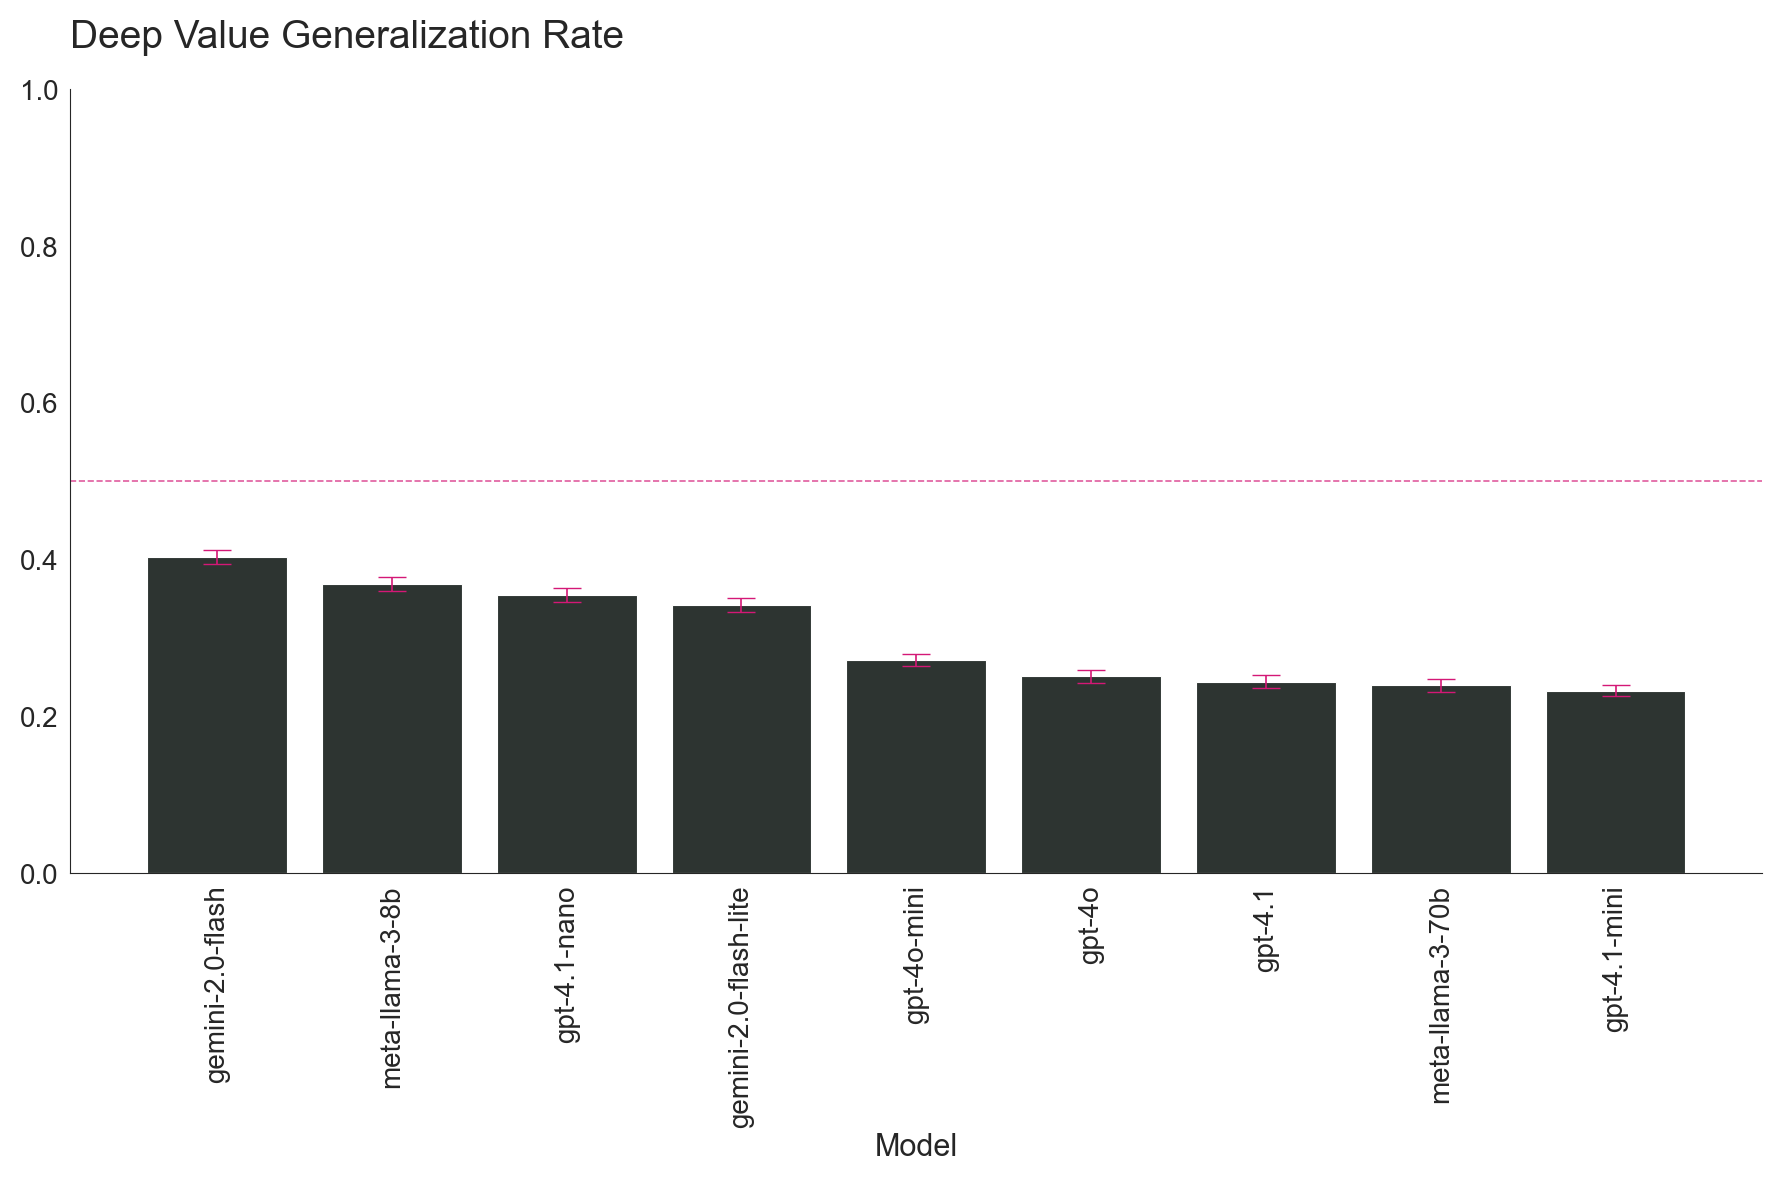

M = 0.30, SD = 0.46, Mdn = 0.00
Mode = 0.00
{'mean': np.float64(0.3), 'median': np.float64(0.0), 'sd': np.float64(0.46), 'mode': np.float64(0.0)} 2


In [7]:
# set figsize 18,12

mypal = make_aesthetic(font_scale=2)
df_comparison = df_comparison.sort_values(by='point_estimate', ascending=False)
df_comparison = df_comparison.reset_index(drop=True)


plt.figure(figsize=(18, 12))
ax = sns.barplot(data=df_comparison, x='model', y='point_estimate')

for i in range(len(df_comparison)):
    row = df_comparison.iloc[i]
    ax.errorbar(
        i, row['point_estimate'],
        yerr=[[row['point_estimate'] - row['point_estimate_lower']], 
              [row['point_estimate_upper'] - row['point_estimate']]],
        fmt='none', color=mypal[1], capsize=10
    )

# Customize the plot
plt.title('Deep Value Generalization Rate')
plt.xlabel('Model')
plt.ylabel('')
plt.xticks(rotation=90)
plt.ylim(0, 1)
plt.axhline(y=0.5, color=mypal[1], linestyle='--', alpha=0.7)
plt.tight_layout()

plt.savefig("plots/model_level_summary.pdf", dpi=300, bbox_inches='tight')
plt.show()


print(array_stats(df['y']), 2)

df_comparison

## Table of raw vs model DVGRs

In [15]:
# data_pt = {
#         'model': llm,
#         'point_estimate': point_estimate,
#         'point_estimate_lower': point_estimate_lower,
#         'point_estimate_upper': point_estimate_upper, 
#         'model_prob': prob,
#         'model_prob_lower': lower,
#         'model_prob_upper': upper,
#         'n': len(tdf),
#     }
   

comppoints = []
for model in df_comparison['model'].unique():
    tdf = df_comparison[df_comparison['model']==model].iloc[0]
    raw_point_estimate = tdf['point_estimate']
    raw_lower = tdf['point_estimate_lower']
    raw_upper = tdf['point_estimate_upper']

    model_point_estimate = tdf['model_prob']
    model_lower = tdf['model_prob_lower']
    model_upper = tdf['model_prob_upper']

    raw_str = f"{smart_rounder(raw_point_estimate, 2)} [{smart_rounder(raw_lower, 2)}, {smart_rounder(raw_upper, 2)}]"
    model_str = f"{smart_rounder(model_point_estimate, 2)} [{smart_rounder(model_lower, 2)}, {smart_rounder(model_upper, 2)}]"
    stars = p_value_stars(tdf['binomial_p'])

    comppoint = {
        'Model': model,
        'Raw Estimate': raw_str,
        'Mixed Model Estimate': model_str,
        'P-Value': stars
    }
    comppoints.append(comppoint)

comdf = pd.DataFrame(comppoints)
comdf = comdf.sort_values(by='Raw Estimate')

comdf.to_latex(
    "tables/point_v_model.tex",
    index=False,
    escape=False,
    caption = "Comparison of DVGR estimates from raw data and mixed models that account for model-specific propensities to generalize certain deep values over others. 95\% CIs in brackets. Raw Estimate CIs are computed using the Wilson method. Model Estimate CIs are from the Pymer4 package. P-Value refers to p-value from two-tailed binomial test for whether the raw proportion differs from chance (0.5). $***p < 0.001; **p<0.01; *p<0.05$.",
    label="point_v_model"
)





<>:43: SyntaxWarning: invalid escape sequence '\%'
<>:43: SyntaxWarning: invalid escape sequence '\%'
/var/folders/kj/8p_kqzx533b8vldhm5sdjfc00000gn/T/ipykernel_32152/2230202229.py:43: SyntaxWarning: invalid escape sequence '\%'
  caption = "Comparison of DVGR estimates from raw data and mixed models that account for model-specific propensities to generalize certain deep values over others. 95\% CIs in brackets. Raw Estimate CIs are computed using the Wilson method. Model Estimate CIs are from the Pymer4 package. P-Value refers to p-value from two-tailed binomial test for whether the raw proportion differs from chance (0.5). $***p < 0.001; **p<0.01; *p<0.05$.",


In [8]:
from statsmodels.stats.proportion import test_proportions_2indep
import pandas as pd
import numpy as np

def compare_proportions(count1, nobs1, count2, nobs2, compare='diff', correction=True):
    """
    Compare proportions using the statsmodels function.
    
    Parameters:
    - count1: Count of successes for group 1
    - nobs1: Total observations for group 1
    - count2: Count of successes for group 2
    - nobs2: Total observations for group 2
    - compare: Type of comparison ('diff' or 'ratio')
    - correction: Whether to apply continuity correction
    
    Returns:
    - result: Result of the proportion test
    """
    result = test_proportions_2indep(count1, nobs1, count2, nobs2, compare=compare, correction=correction)
    return result

def compare_proportions_wrapper(df, model1, model2):
    """
    Wrapper function to compare proportions between two models.
    
    Parameters:
    - df: DataFrame containing the data
    - model1: Name of the first model
    - model2: Name of the second model
    
    Returns:
    - result: Result of the proportion test
    """
    tdf1 = df[df['model'] == model1]
    tdf2 = df[df['model'] == model2]
    count1 = tdf1['generalized_deep_value'].sum()
    nobs1 = len(tdf1)
    count2 = tdf2['generalized_deep_value'].sum()
    nobs2 = len(tdf2)
    result = compare_proportions(count1, nobs1, count2, nobs2)
    print(f"Comparing {model1} and {model2}")
    print(f"DVGR: {count1/nobs1:.2f} vs {count2/nobs2:.2f}")
    return result

# Ensure the DataFrame is loaded and processed correctly
files = "data/results/dvb_results_*.csv"
files = glob.glob(files)
dfs = [pd.read_csv(c) for c in files]
df = pd.concat(dfs)

# Ensure 'value2' is defined correctly
df['value2'] = df['context_correlation_pair'].apply(lambda x: x.split(" - ")[0].split("_")[3])

# Filter successful rows
df = df[df['success'] == 1]

# Compare all models with each other
models = df['model'].unique()
results = []

for i in range(len(models)):
    for j in range(i + 1, len(models)):
        model1 = models[i]
        model2 = models[j]
        result = compare_proportions_wrapper(df, model1, model2)
        results.append({
            'model1': model1,
            'model2': model2,
            'result': result
        })

# Convert results to a DataFrame for better readability
results_df = pd.DataFrame(results)
print(results_df)

Comparing replicate/meta/meta-llama-3-70b-instruct and gemini/gemini-2.0-flash-lite
DVGR: 0.24 vs 0.00
Comparing replicate/meta/meta-llama-3-70b-instruct and gpt-4.1-2025-04-14
DVGR: 0.24 vs 0.24
Comparing replicate/meta/meta-llama-3-70b-instruct and gpt-4o-2024-08-06
DVGR: 0.24 vs 0.26
Comparing replicate/meta/meta-llama-3-70b-instruct and replicate/meta/meta-llama-3-8b-instruct
DVGR: 0.24 vs 0.37
Comparing replicate/meta/meta-llama-3-70b-instruct and gpt-4.1-mini-2025-04-14
DVGR: 0.24 vs 0.25
Comparing replicate/meta/meta-llama-3-70b-instruct and gpt-4o-mini-2024-07-18
DVGR: 0.24 vs 0.27
Comparing replicate/meta/meta-llama-3-70b-instruct and gpt-4.1-nano-2025-04-14
DVGR: 0.24 vs 0.35
Comparing replicate/meta/meta-llama-3-70b-instruct and gemini/gemini-2.0-flash
DVGR: 0.24 vs 0.20
Comparing gemini/gemini-2.0-flash-lite and gpt-4.1-2025-04-14
DVGR: 0.00 vs 0.24
Comparing gemini/gemini-2.0-flash-lite and gpt-4o-2024-08-06
DVGR: 0.00 vs 0.26
Comparing gemini/gemini-2.0-flash-lite and rep

/Users/joshash/locresearch/LocResearch/dvb_wrapper/dvb/.venv_fix/lib/python3.12/site-packages/statsmodels/stats/proportion.py:1768: RuntimeWarning: divide by zero encountered in scalar divide
  ratio = p1 / p2
/Users/joshash/locresearch/LocResearch/dvb_wrapper/dvb/.venv_fix/lib/python3.12/site-packages/statsmodels/stats/proportion.py:1769: RuntimeWarning: divide by zero encountered in scalar divide
  odds_ratio = p1 / (1 - p1) / p2 * (1 - p2)


In [ ]:
comparisons = [
("gemini/gemini-2.0-flash-lite", "gemini/gemini-2.0-flash"),
    ("gpt-4.1-mini-2025-04-14", "gpt-4.1-2025-04-14"),
    ("gpt-4.1-nano-2025-04-14", "gpt-4.1-mini-2025-04-14")
]

for comparison in comparisons:
    model1, model2 = comparison
    result = compare_proportions_wrapper(df, model1, model2)
    print(f"Comparison between {model1} and {model2}:")
    print(result)
    print("\n")
    
    
result
    

In [ ]:
df['y'] = df['generalized_deep_value'].astype(int)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


small_font = 12
bigger_font = 16


def smart_rounder(x, precision=2, sci_threshold=1e-3):
    """
    Rounds a number using scientific notation or normal rounding based on its magnitude.

    Parameters:
    - x: The number to round.
    - precision: Number of decimal places for normal rounding (default: 2).
    - sci_threshold: Threshold below which scientific notation is used (default: 1e-3).

    Returns:
    - A string representing the rounded number.
    """
    if abs(x) < sci_threshold or abs(x) >= 1e6:
        return f"{x:.{precision}e}"
    else:
        return f"{round(x, precision)}"
    
# Your comparisons list
comparisons = [
    ("gemini/gemini-2.0-flash-lite", "gemini/gemini-2.0-flash"),
    ("gpt-4.1-mini-2025-04-14", "gpt-4.1-2025-04-14"),
    ("gpt-4.1-nano-2025-04-14", "gpt-4.1-mini-2025-04-14")
]

name_map = {
    "gemini/gemini-2.0-flash-lite": "Gemini-2.0-Flash-Lite",
    "gemini/gemini-2.0-flash": "Gemini-2.0-Flash",
    "gpt-4.1-mini-2025-04-14": "GPT-4.1-Mini",
    "gpt-4.1-2025-04-14": "GPT-4.1",
    "gpt-4.1-nano-2025-04-14": "GPT-4.1-Nano"
}

fig, axes = plt.subplots(1, len(comparisons), figsize=(12, 3))


for i, (smaller_model, larger_model) in enumerate(comparisons):
    pair_data = df[df['model'].isin([smaller_model, larger_model])].copy()
    
    compare_data = compare_proportions_wrapper(df, smaller_model, larger_model)
    p_value = smart_rounder(compare_data.pvalue, precision=2)
    diff = smart_rounder(compare_data.diff)
    
    # Create a categorical order to ensure smaller model is shown first
    model_order = [smaller_model, larger_model]
    
    # Get shortened model names for display
    smaller_name = name_map.get(smaller_model, smaller_model)
    larger_name = name_map.get(larger_model, larger_model)
    
    # Create the plot - using horizontal bars to save vertical space
    sns.barplot(
        data=pair_data,
        y='model',  # Swap x and y for horizontal bars
        x='y',
        order=model_order,
        ax=axes[i],
        orient='h',  # Horizontal orientation, 
        palette=mypal
    )
    
    # Customize the plot
    axes[i].set_title(f'{smaller_name} vs\n{larger_name}\n(diff= {diff}, p= {p_value})', fontsize=small_font)
    axes[i].set_xlabel('')  # Only label the first subplot
    axes[i].set_ylabel('')
    
    if i == 0:
        axes[i].set_xlabel('\nDeep Value Generalization Rate', fontsize=bigger_font, fontweight='bold')
    
    # Format y-axis labels to be shorter/cleaner
    labels = ["Smaller", "Larger"]
    axes[i].set_yticklabels(labels, fontsize=small_font)
    
    axes[i].tick_params(axis='x', labelsize=small_font)    
    # Remove some borders to clean up appearance
    sns.despine(ax=axes[i])

plt.tight_layout()
plt.subplots_adjust(wspace=0.3)  # Adjust spacing between subplots
plt.show()

In [ ]:
from scipy.stats.contingency import association
contingency_table = pd.crosstab(df['context'], df['y'])
association(contingency_table, method='cramer')


In [ ]:
df